<a href="https://colab.research.google.com/github/LeenaGannu/Malaria-Detection-Using-DL/blob/main/Outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math 
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

data = pd.read_csv('/content/Outbreak_detect.csv')
data

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,No
1,34,23,83.27,15.22,10717,677,Yes
2,40,23,50.74,0.00,1257,127,No
3,34,24,59.16,9.06,4198,211,No
4,34,27,73.23,0.00,11808,712,Yes
5,31,24,88.77,41.40,10881,648,Yes
6,33,24,77.94,23.88,8830,459,Yes
7,31,24,84.57,11.15,9693,482,No
8,36,24,53.40,2.12,9310,549,No
9,32,23,57.50,0.00,13154,838,Yes





**Label Encoding*

In [ ]:

# importing the preprocessing module from scikit-learn

from sklearn import preprocessing
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

data.Outbreak = LE.fit_transform(data.Outbreak)
data.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,0
1,34,23,83.27,15.22,10717,677,1
2,40,23,50.74,0.00,1257,127,0
3,34,24,59.16,9.06,4198,211,0
4,34,27,73.23,0.00,11808,712,1


In [ ]:
shuffler = rn.sample(range(24),23) # Generating 100 random & unique integers

data['new_index'] = shuffler # Adding it as a new column

data.set_index('new_index',inplace=True) # Resetting the index

# Finally Sorting the DataFrame according to the new index
data.sort_index(inplace=True)
data

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
new_index,,,,,,,
0,40,23,50.74,0.00,1257,127,0
1,31,24,84.57,11.15,9693,482,0
2,33,23,80.97,6.92,10990,390,1
3,34,18,59.40,0.00,2197,136,0
4,31,23,73.35,4.97,10659,612,1
5,45,32,34.74,0.38,416,26,0
6,32,24,87.32,11.92,6536,338,0
7,34,24,59.16,9.06,4198,211,0
8,36,26,72.78,3.54,5138,213,0


In [ ]:
data.Outbreak

new_index
0     0
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
14    0
15    0
16    0
17    1
18    1
19    1
20    0
21    0
22    1
23    0
Name: Outbreak, dtype: int64

In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
data_scaled = pd.DataFrame(sst.fit_transform(data.drop('Outbreak',axis=1)))

# Adding the Class column back to the DataFram

In [ ]:
data_scaled

,0,1,2,3,4,5
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,-1.675490
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,-0.289836
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,-0.853868
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,-0.844986
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,-0.405307


In [ ]:
data_scaled['Class'] = data.Outbreak

In [ ]:
data_scaled

,0,1,2,3,4,5,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052,1.0
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,-1.675490,0.0
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,-0.289836,0.0
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,-0.853868,0.0
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,-0.844986,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,-0.405307,0.0


In [ ]:
df = data_scaled[data_scaled['Class'].notna()]

In [ ]:
df

,0,1,2,3,4,5,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052,1.0
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,-1.675490,0.0
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,-0.289836,0.0
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,-0.853868,0.0
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,-0.844986,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,-0.405307,0.0


In [ ]:

# Our dataset consists of 100 data points. So splitting it on a 70:30 ratio. 
# You can also some other ratio

# First 70 Data points for Training
data_train = df.iloc[:16,:]

#Last 30 for Testing
data_test = df.iloc[16:,:]

In [ ]:

data_train

,0,1,2,3,4,5,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052,1.0
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,-1.675490,0.0
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,-0.289836,0.0
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,-0.853868,0.0
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,-0.844986,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,-0.405307,0.0


In [ ]:
data_train[0]

0     1.161674
1    -0.876178
2    -0.423322
3    -0.196894
4    -0.876178
5     2.293814
6    -0.649750
7    -0.196894
8     0.255962
9     0.935246
10   -0.423322
11   -0.196894
12   -0.649750
14   -1.102606
15   -0.423322
16   -1.102606
Name: 0, dtype: float64

In [ ]:
data_test

,0,1,2,3,4,5,Class
17,-0.876178,0.015169,1.410252,3.675483,0.850402,1.086935,1.0
18,-0.196894,-0.333717,1.042817,0.918413,0.806224,1.215729,1.0
19,-1.329034,-2.078144,-1.197198,-0.684437,-1.499952,-1.293547,1.0
20,0.255962,0.015169,-0.952687,-0.461175,0.427204,0.647256,0.0
21,1.161674,1.061826,-0.246544,-0.684437,0.927984,1.655408,0.0
22,1.840958,1.410711,0.094168,-0.194736,-0.056605,0.029930,1.0


In [ ]:
def gda(data_train):
  # Initializing all the weights as 0
  W0_new = 0
  W1_new = 0
  W2_new = 0
  W3_new = 0
  W4_new = 0
  W5_new = 0
  W6_new = 0

  # Alpha
  a = 0.02

  # MSE
  MSE = np.array([])

  #sigmoid function 
  def sigmoid(output):
      z = 1/(1+math.exp(-output)) 
      return z

  for epoch in range(len(data_train)):
      
      p_preds = np.array([])
      p_pred_exps = np.array([])
      error = np.array([])
      error_x1 = np.array([])
      error_x2 = np.array([])
      error_x3 = np.array([])
      error_x4 = np.array([])
      error_x5 = np.array([])
      error_x6 = np.array([])
      p_class = np.array([])
      
      # Assigning all the weights their new values after an epoch:
      W0 = W0_new
      W1 = W1_new
      W2 = W2_new
      W3 = W3_new
      W4 = W4_new
      W5 = W5_new
      W6 = W6_new
      
      # Iterating through the Df and calculating all parameters:
      for row in data_train.itertuples():
          
          #The predicted value:
          p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4] + W5*row[5]+W6*row[6]
          p_preds = np.append(p_preds, p_pred)
          
          # Predicted value after applying the sigmoid function
          p_pred_exp = sigmoid(p_pred)
          p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
          
          # Bifurcating the predicted class as per its probability to be the default class
      
          if p_pred_exp > 0.5:
              p_class = np.append(p_class,1.0)
          else:
              p_class = np.append(p_class,0.0)
      
      # The error in prediction desiredop - opfromneuron (sum)
      error = p_pred_exps - data_train.Class 
      
      # Pre-calculating the error*x values for all the weights:
      error_x1 = error*data_train[0]
      error_x2 = error*data_train[1]
      error_x3 = error*data_train[2]
      error_x4 = error*data_train[3]
      error_x5 = error*data_train[4]
      error_x6 = error*data_train[5]
      # Calculating MSE
      MSE_val = (error).mean()
      MSE = np.append(MSE,MSE_val)
      
      # Updating the weights
      W0_new = W0 - a*np.sum(error)
      W1_new = W1 - a*np.sum(error_x1)
      W2_new = W2 - a*np.sum(error_x2)
      W3_new = W3 - a*np.sum(error_x3)
      W4_new = W4 - a*np.sum(error_x4)
      W5_new = W5 - a*np.sum(error_x5)
      W6_new = W6 - a*np.sum(error_x6)

  # Adding the predicted class as a separate column to check for performance:
  data_train['pred_class']=p_class

  # Check if any class has been mis classified 

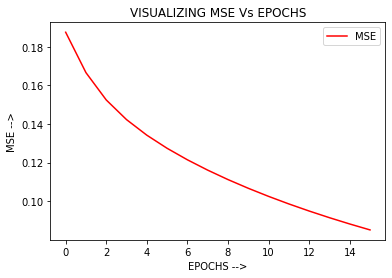

In [ ]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title("VISUALIZING MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()

In [ ]:
MSE

array([0.1875    , 0.16658212, 0.15244628, 0.14226505, 0.13421124,
       0.12742101, 0.12146651, 0.1161154 , 0.11123003, 0.10672257,
       0.10253332, 0.09861952, 0.09494908, 0.09149703, 0.08824325,
       0.08517106])

In [ ]:
a

0.02

In [ ]:
MSE

array([0.1875    , 0.16658212, 0.15244628, 0.14226505, 0.13421124,
       0.12742101, 0.12146651, 0.1161154 , 0.11123003, 0.10672257,
       0.10253332, 0.09861952, 0.09494908, 0.09149703, 0.08824325,
       0.08517106])

In [ ]:
gda(data_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def confusionMatrix(data_train):
  # True Positives:
  print('TP: ',data_train.Class[(df.Class==1) & (data_train.pred_class==1)].count())
  # False Positives:
  print('FP: ',data_train.Class[(df.Class==0) & (data_train.pred_class==1)].count())
  #True Negatives:
  print('TN: ',data_train.Class[(df.Class==0) & (data_train.pred_class==0)].count())
  #False Negatives:
  print('FN: ',data_train.Class[(df.Class==1) & (data_train.pred_class==0)].count())

In [ ]:
confusionMatrix(data_train)

TP:  4
FP:  1
TN:  10
FN:  1


In [ ]:
TP = 4
FP = 1
TN = 10
FN = 1
Train_Accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Training Accuracy: ",Train_Accuracy)

Training Accuracy:  0.875


In [ ]:
gda(data_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
confusionMatrix(data_test)

TP:  3
FP:  0
TN:  2
FN:  1


In [ ]:
TP = 3
FP = 0
TN = 2
FN = 1
Test_Accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Testing Accuracy: ",Test_Accuracy)

Testing Accuracy:  0.8333333333333334


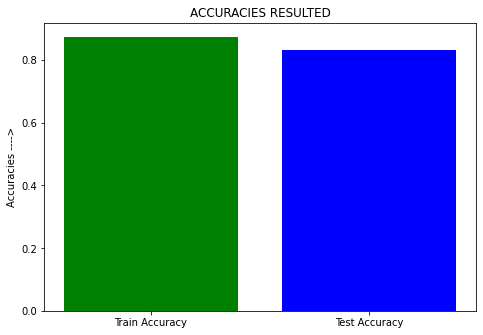

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['Train Accuracy', 'Test Accuracy']
ax.bar(algo[0],Train_Accuracy,color = 'g')
ax.bar(algo[1],Test_Accuracy,color = 'b')
plt.ylabel('Accuracies ---->')
plt.title('ACCURACIES RESULTED')
plt.show()

In [ ]:
data_train.columns

Index([0, 1, 2, 3, 4, 5, 'Class', 'pred_class'], dtype='object')

In [ ]:
df.head()

,0,1,2,3,4,5,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052,1.0


In [ ]:
df

,0,1,2,3,4,5,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052,1.0
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,-1.675490,0.0
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,-0.289836,0.0
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,-0.853868,0.0
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,-0.844986,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,-0.405307,0.0


In [ ]:
df1 = df.copy()

In [ ]:
df1

,0,1,2,3,4,5,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,-1.226929,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.349696,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,-0.058894,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,-1.186958,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,0.927052,1.0
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,-1.675490,0.0
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,-0.289836,0.0
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,-0.853868,0.0
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,-0.844986,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,-0.405307,0.0


In [ ]:
df1.columns

Index([0, 1, 2, 3, 4, 5, 'Class'], dtype='object')

In [ ]:
df1 = df1.drop(5,axis=1)


In [ ]:
df1

,0,1,2,3,4,Class
0,1.161674,-0.333717,-1.130392,-0.684437,-1.742126,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.530377,0.0
2,-0.423322,-0.333717,0.889163,0.044323,0.879765,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,-1.488907,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,0.790600,1.0
5,2.293814,2.806253,-2.199293,-0.644418,-1.968675,0.0
6,-0.649750,0.015169,1.313383,0.570883,-0.320060,0.0
7,-0.196894,0.015169,-0.567883,0.269690,-0.949874,0.0
8,0.255962,0.712940,0.342019,-0.311632,-0.696656,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.109603,0.0


In [ ]:
df1 = df1.drop(4,axis=1)


In [ ]:
df1

,0,1,2,3,Class
0,1.161674,-0.333717,-1.130392,-0.684437,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.0
2,-0.423322,-0.333717,0.889163,0.044323,1.0
3,-0.196894,-2.078144,-0.551849,-0.684437,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,1.0
5,2.293814,2.806253,-2.199293,-0.644418,0.0
6,-0.649750,0.015169,1.313383,0.570883,0.0
7,-0.196894,0.015169,-0.567883,0.269690,0.0
8,0.255962,0.712940,0.342019,-0.311632,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.0


In [ ]:
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0

# Alpha
a = 0.02

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z

for epoch in range(len(df1)):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
     
    # The error in prediction
    error = p_pred_exps - df1.Class 
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1[0]
    error_x2 = error*df1[1]
    error_x3 = error*df1[2]
    error_x4 = error*df1[3]
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)

# Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class

# Check if any class has been mis classified 

In [ ]:
df1

,0,1,2,3,Class,pred_class
0,1.161674,-0.333717,-1.130392,-0.684437,0.0,0.0
1,-0.876178,0.015169,1.129666,0.489793,0.0,1.0
2,-0.423322,-0.333717,0.889163,0.044323,1.0,0.0
3,-0.196894,-2.078144,-0.551849,-0.684437,0.0,0.0
4,-0.876178,-0.333717,0.380099,-0.161036,1.0,0.0
5,2.293814,2.806253,-2.199293,-0.644418,0.0,0.0
6,-0.649750,0.015169,1.313383,0.570883,0.0,1.0
7,-0.196894,0.015169,-0.567883,0.269690,0.0,0.0
8,0.255962,0.712940,0.342019,-0.311632,0.0,0.0
9,0.935246,0.364054,-1.345508,-0.684437,0.0,0.0


In [ ]:
# Checking how many mis-classifications did our model come out with

df1.pred_class.astype('int64')
df1[df1.pred_class != df1.Class]

# Checking the final weights 
print(W0_new,W1_new,W2_new,W3_new,W4_new)

-0.3736192965992695 -0.2530163366084594 -0.015565820736306734 0.09884563462165213 0.5798988202136244


In [ ]:
# True Positives:
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives:
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives:
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives:
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  3
FP:  3
TN:  10
FN:  6


In [ ]:
TP = 7
FP = 3
TN = 10
FN = 1
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print(Accuracy)

0.8095238095238095


In [ ]:
Accuracy

0.8095238095238095

In [ ]:
MSE

array([0.09090909, 0.08284492, 0.07528778, 0.06829339, 0.06186165,
       0.05597189, 0.05059446, 0.04569565, 0.04124041, 0.03719386,
       0.0335223 , 0.03019373, 0.02717813, 0.02444761, 0.0219764 ,
       0.01974081, 0.01771914, 0.01589155, 0.01423996, 0.01274789,
       0.01140036, 0.01018376])

In [ ]:
inputt = [float(x) for x in "40 23 50.74 0.00".split(' ')]
print(inputt)

xmin = min(inputt)
xmax = max(inputt)
xnorm1 = (inputt[0]-xmin)/(xmax-xmin)
print(xnorm1)
xnorm2 = (inputt[1]-xmin)/(xmax-xmin)
xnorm3 = (inputt[2]-xmin)/(xmax-xmin)
print(xnorm3)
xnorm4 = (inputt[3]-xmin)/(xmax-xmin)
print(xnorm4)


[40.0, 23.0, 50.74, 0.0]
0.7883326763894363
1.0
0.0
